In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from pymks import (generate_multiphase, plot_microstructures, PrimitiveTransformer,
                   TwoPointCorrelation,FlattenTransformer, PrimitiveBasis)
from pymks.stats import correlate
from pymks.tools import draw_microstructures
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.decomposition import PCA

%matplotlib inline
%reload_ext autoreload
%autoreload 2

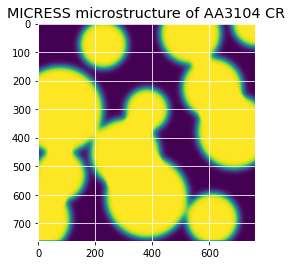

In [5]:
im = Image.open(r'C:\Users\mikep\Desktop\project\fiji data\movie0000.tif')
plt.figure()
plt.imshow(im)
plt.title("MICRESS microstructure of AA3104 CR")
plt.show()

In [11]:
#imarray = np.expand_dims(np.array(im), axis=0)

#fig = plot_microstructures(imarray)

imarray=np.array(im)
imarray.shape

(762, 759)

In [12]:
imarray2 = np.expand_dims(imarray, axis=0)
imarray2.shape

(1, 762, 759)

In [13]:
data = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(imarray2)
data.shape

(1, 762, 759, 2)

In [14]:
#model = Pipeline(steps=[
#    ('discretize', PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
#    ('correlations', TwoPointCorrelation(
#        periodic_boundary=True,
#        correlations=[[0,0], [1,1], [0,1]]
#                                        ).transform(data))
#])

#print(imarray.shape)
#x_stats = model.transform(imarray).persist()
#print(x_stats.shape)



#X = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(imarray)
#X.shape
#X_ = prim_basis.discretize(imarray)
#X_corr = correlate(X_, periodic_axes=[0, 1], basis=prim_basis)

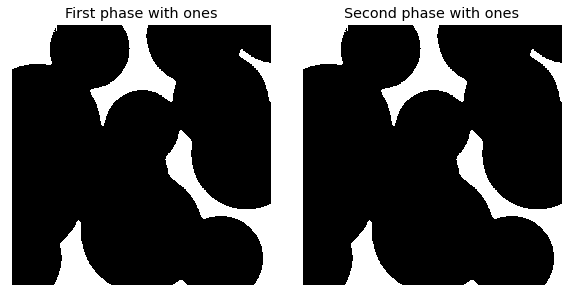

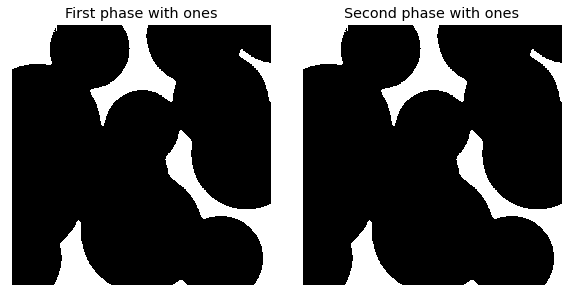

In [15]:
plot_microstructures(
    data[0, :, :, 0],
    data[0, :, :, 0],
    titles=['First phase with ones', 'Second phase with ones'],
    cmap='gray',
    colorbar=False
)

In [16]:
auto_correlation = TwoPointCorrelation(
    periodic_boundary=True,
    cutoff=25,
    correlations=[(0,0)]
).transform(data)

In [17]:
auto_correlation.shape

(1, 51, 51, 1)

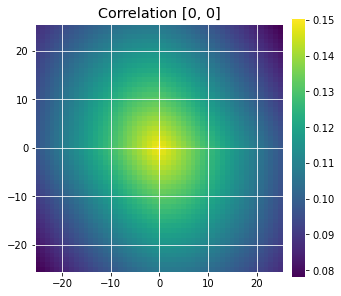

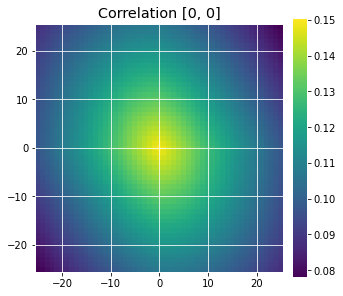

In [19]:
plot_microstructures(
    auto_correlation[0, :, :, 0],
    titles=['Correlation [0, 0]'],
    showticks=True
)

In [20]:
grain_sizes = [(30, 5), (10, 40), (15, 15), (5, 30)]
seeds = [10, 99, 4, 36]

data_synth = np.concatenate([
    generate_multiphase(shape=(10, 828, 834), grain_size=grain_size,
        volume_fraction=(0.8, 0.2),
        percent_variance=0.2,
        seed=seed
    )
    for grain_size, seed in zip(grain_sizes, seeds)
])

data_synth.shape

(40, 828, 834)

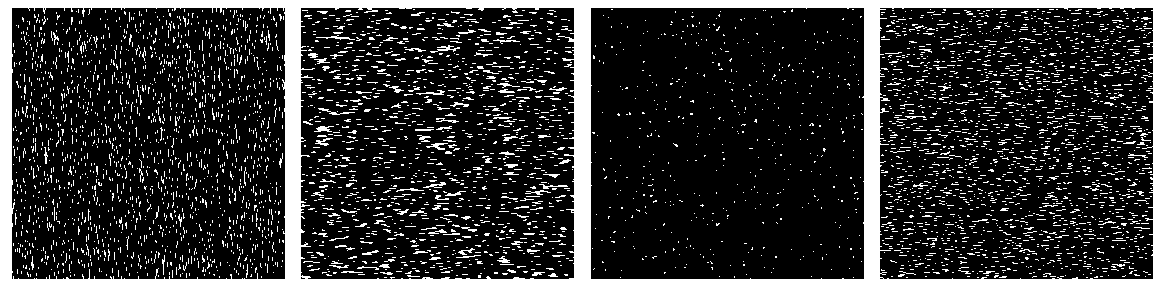

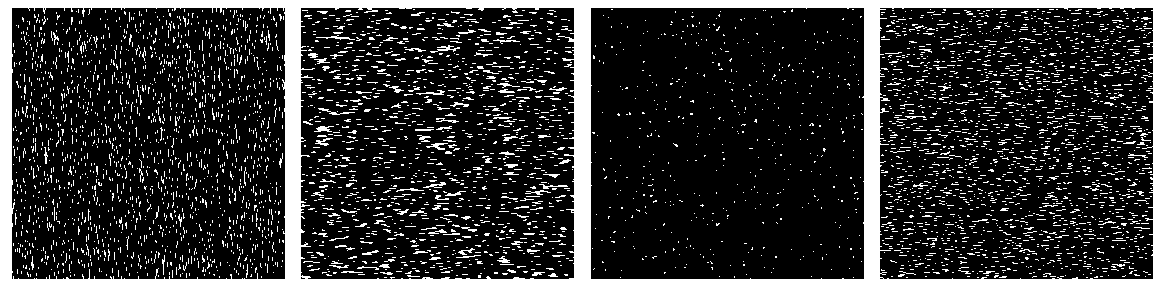

In [21]:
plot_microstructures(*data_synth[::10], cmap='gray', colorbar=False)

In [22]:
data_disc = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(data_synth)

In [23]:
data_disc.shape

(40, 828, 834, 2)

In [24]:
data_synth2=np.concatenate((data, data_disc))
data_synth2.shape

ValueError: ('Shapes do not align: %s', [(1, 762, 759, 2), (40, 828, 834, 2)])

In [24]:
data_corr = TwoPointCorrelation(
    periodic_boundary=True,
    cutoff=10,
    correlations=[(0, 0), (0, 1)]
).transform(data_synth2)

In [25]:
data_corr.shape

(41, 21, 21, 2)

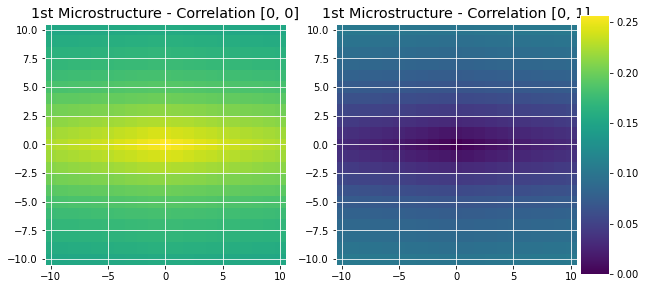

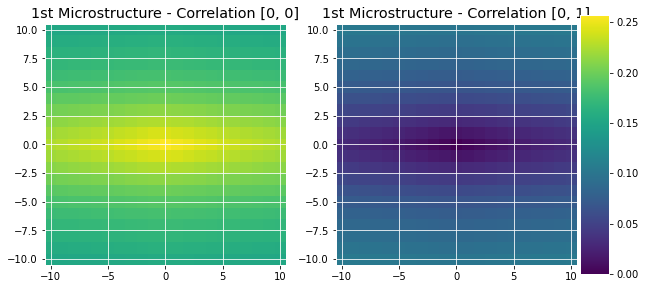

In [26]:
plot_microstructures(
    data_corr[0, :, :, 0],
    data_corr[0, :, :, 1],
    titles=['1st Microstructure - Correlation [0, 0]', '1st Microstructure - Correlation [0, 1]'],
    showticks=True
)

In [28]:
pc_scores = PCA(
    svd_solver='full',
    n_components=3,
    random_state=10
).fit_transform(data_corr.reshape(40,-1))

IndexError: Bad index.  Must be integer-like: 904.05

In [29]:
%matplotlib notebook

In [30]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
pc1, pc2, pc3, pc4 = np.split(pc_scores, 4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pc1[:,0], pc1[:,1], pc1[:,2], c='r', marker='o')
ax.scatter(pc2[:,0], pc2[:,1], pc2[:,2], c='g', marker='o')
ax.scatter(pc3[:,0], pc3[:,1], pc3[:,2], c='b', marker='o')
ax.scatter(pc4[:,0], pc4[:,1], pc4[:,2], c='k', marker='o')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

NameError: name 'pc_scores' is not defined